In [271]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Importing libraries**

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Data Description**

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	  Ticket class	  1 = 1st, 2 = 2nd, 3 = 3rd
sex	  Sex	 M/F
Age=>Age in years	
sibsp  ie. # of siblings / spouses aboard the Titanic	
parch ie.  # of parents / children aboard the Titanic	
ticket  Ticket number	
fare  Passenger fare	
cabin  Cabin number	
embarked  Port of Embarkation	  C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**
1. pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower
1. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
1. sibsp: The dataset defines family relations in this way...
*       Sibling = brother, sister, stepbrother, stepsister
1. Spouse = husband, wife (mistresses and fiancés were ignored)
1. parch: The dataset defines family relations in this way...
1. Parent = mother, father
1. Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Loading libraries**

In [273]:
train=pd.read_csv("E:/Data Science/data/Titanic/train.csv")
test=pd.read_csv("E:/Data Science/data/Titanic/test.csv")

In [274]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [275]:
#statistical info 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* *total=891 entries*

In [276]:
#datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


cabin has many null values we can see so we will hv to drop it (891-204=687)

In [277]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* missing values in age,cabin,embarked
* cabin needs to be dropped (too much missing values)
* Ticket can be dropped (no use)

## **Exploratory Data Analysis** ##

0    549
1    342
Name: Survived, dtype: int64


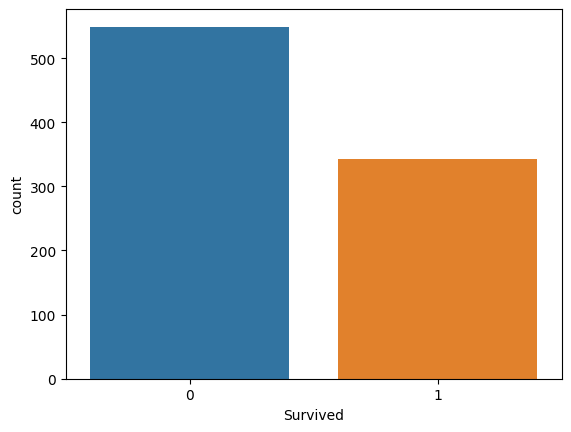

In [278]:
## Categorical Attributes
sns.countplot(data=train,x='Survived')      # or plt.hist(train['Survived'])
print(train['Survived'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


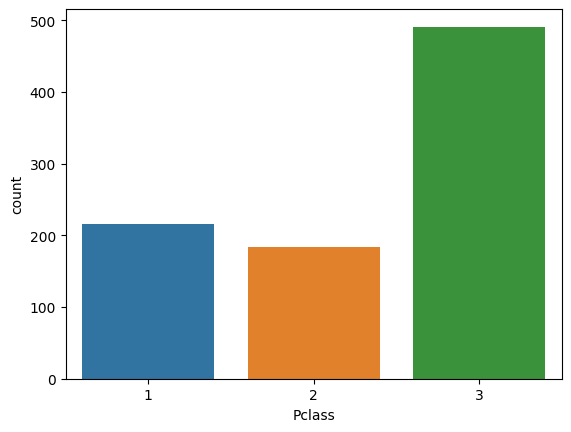

In [279]:
sns.countplot(data=train,x='Pclass') # remember the objective : who survived
print(train['Pclass'].value_counts())

* we note most are class 3 passengers, ..(we can think and check maybe class wise priority was provided, ie in each class how many lived how many died)
* distribution is uneven terminology

male      577
female    314
Name: Sex, dtype: int64


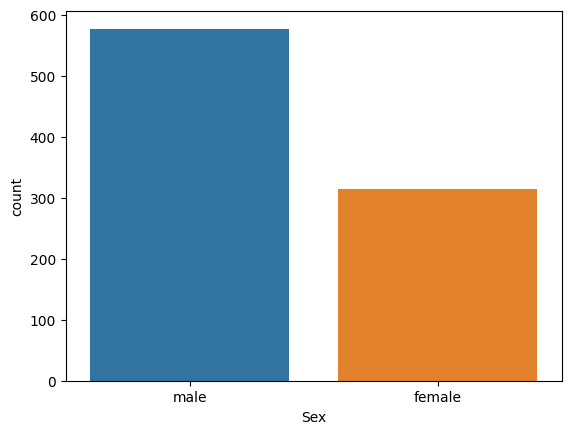

In [280]:
sns.countplot(train,x=train['Sex'])
print(train['Sex'].value_counts())

<Axes: xlabel='SibSp', ylabel='count'>

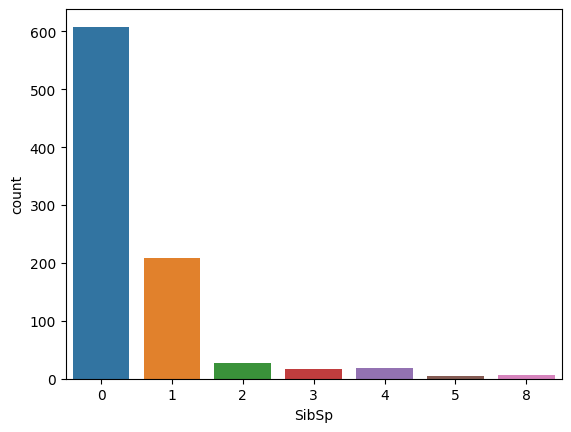

In [281]:
sns.countplot(train,x=train['SibSp'])

<Axes: xlabel='Parch', ylabel='count'>

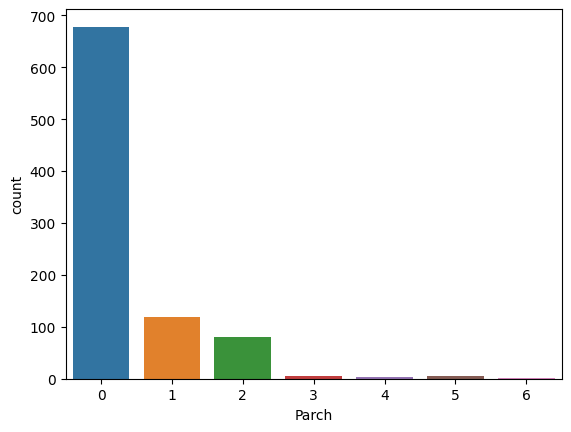

In [282]:
sns.countplot(train,x=train['Parch'])

<Axes: xlabel='Embarked', ylabel='count'>

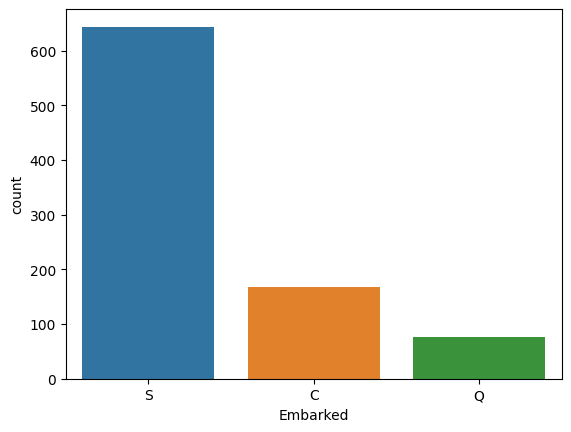

In [283]:
sns.countplot(train,x=train['Embarked'])

* Most people embarked from station S (maybe S is starting point)

### *Now for Continuous variables* 

<Axes: xlabel='Age', ylabel='Density'>

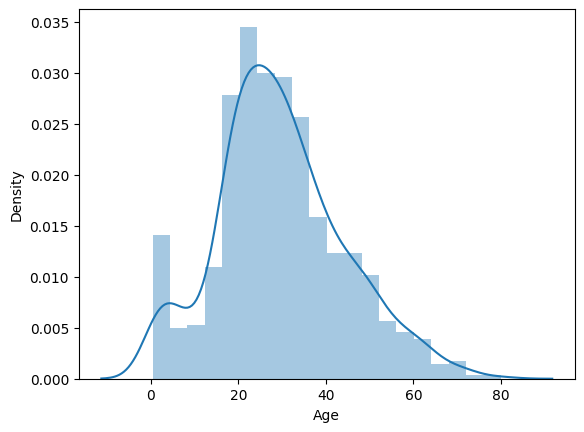

In [284]:
sns.distplot(train['Age'])   

* most are from 20-30 age group
* graph is approximately uniform bell curve so no preprocessing require here to include age into training data (ie we can use age parameter for training)

<Axes: xlabel='Fare', ylabel='Density'>

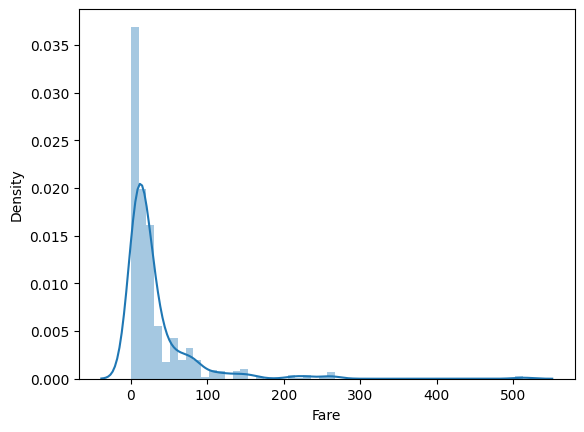

In [285]:
sns.distplot(train['Fare'])

#### **we can't use Fare directly for training purpose as the graph is skewed (right skewed here) and not uniform so first we need to do some preprocessing for fare and make it like bell curve to use for training purpose it is important** 

Making pivot Table it will help to compare ticket class and the price

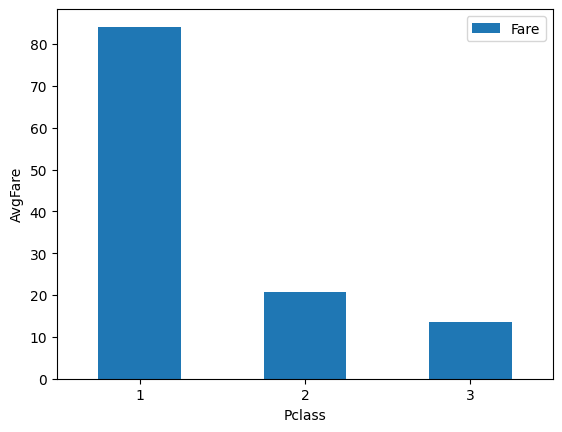

In [286]:
class_fare=train.pivot_table(index='Pclass',values="Fare",)   #  by default gives mean ie avg
class_fare.plot(kind='bar')
plt.xlabel("Pclass")
plt.ylabel("AvgFare")
plt.xticks(rotation=0)
plt.show()

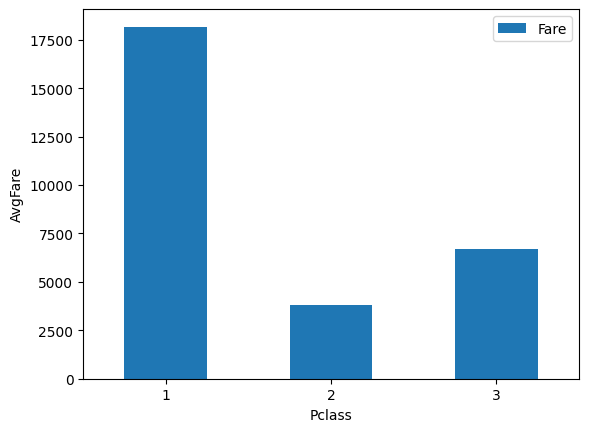

In [287]:
class_fare=train.pivot_table(index='Pclass',values="Fare",aggfunc=sum)   #  by default gives mean ie avg
class_fare.plot(kind='bar')
#plt.title()
plt.xlabel("Pclass")
plt.ylabel("AvgFare")
plt.xticks(rotation=0)
plt.show()

These two graphs indicate that the graph was skewed because of uneven means of fares of different classes- 80,20,15 dollars
(Note : In uniform distribution peak of bell curve indicates mean)(not in skewed)

<Axes: xlabel='Pclass', ylabel='Fare'>

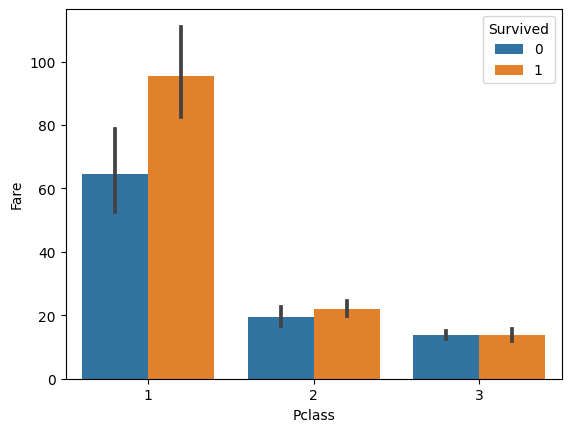

In [288]:
sns.barplot(train,x='Pclass',y='Fare',hue='Survived') #hue => category wise that classes info based on given x and y axis

We can observe passengers of higher class survived more (not by the length here jst by label of survived we see fewer deaths (blue) in class 1 ( y axis is Fare here not how many survived)

<Axes: xlabel='Survived', ylabel='Fare'>

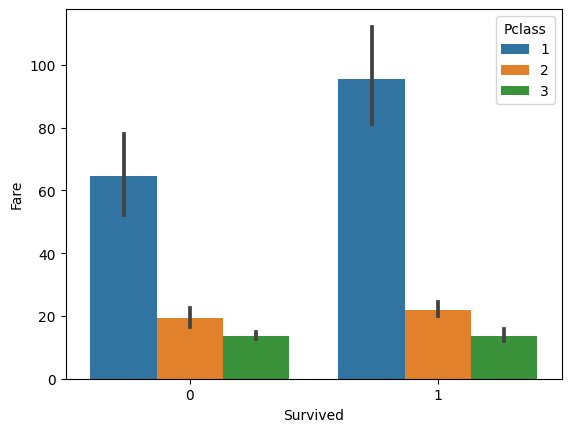

In [289]:
sns.barplot(train,x='Survived',y='Fare',hue='Pclass')

### Data Preprocessing

In [290]:
train_len=len(train)
                                    # combine train and test to do all data processing in them together
df=pd.concat([train,test],axis=0)  # axis=0 => row wise concatenation 1=> column wise ie more columns added
df=df.reset_index(drop=True)                 # df is  combination of both train and test
df.head()                             # we dont need the inde so we drop it (did this agter correln bc got index in corr which was useless)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [291]:
len(df)

1309

In [292]:
df.tail()    #if not done reset index the train and test wil have diff index no

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [293]:
## find null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

cabin should be dropped(most are null), fare,embarked,age should be filled with mean/mode accordingly
survived is empty here because of adding test datatset.

In [294]:
df=df.drop(columns=['Cabin'],axis=1)   # axis=1 => entire column deleted

In [295]:
#df['Age'].mean()

In [296]:
# fill misssing values using mean for numerical column eg(Age,Fare)
#df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [297]:
df['Embarked'].mode()[0]                      #df['Embarked'].mode()  give more than 1 modes if any row wise [0] => 1st row value

'S'

In [298]:
# fill missing values using mode for categorical column
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [299]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [300]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [301]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


### Mapping Title manually b/c there are some titles with very less or only one value.... we will combine those

In [302]:
title_mapping = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,
                'Dr':4,'Rev':4,'Major':4,'Mlle':4,'Col':4,'Jonkheer':4,'Countess':4,'Sir':4,'Ms':4,'Mme':4,'Don':4,'Lady':4,'Capt':4,}


df['Title']=df['Title'].map(title_mapping)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


####  It is better to impute age with mean age according to title (mean age of that title)

<Axes: xlabel='Title', ylabel='Age'>

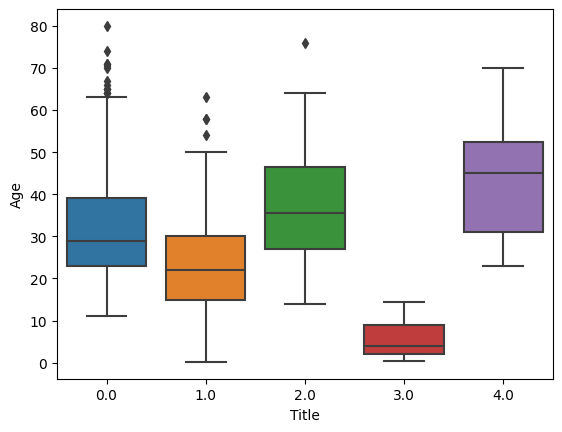

In [303]:
#plt.figure(figsize=(7,7))
sns.boxplot(data=df,x=df['Title'],y=df['Age'])

title_mapping = {'Mr':0,'Miss':1,'Mrs':2,'Master':3,
                'Dr':4,'Rev':4,'Major':4,'Mlle':4,'Col':4,'Jonkheer':4,'Countess':4,'Sir':4,'Ms':4,'Mme':4,'Don':4,'Lady':4,'Capt':4,}



     df['column']=df.apply(function,axis=1)               ## syntax of apply , axis=1 => in column ##
       
     we are only imputing age here
       
     The apply() method takes each element in the Series train[['Age','Title']] and applies the impute_age function on it.

In [304]:
def impute_age(cols):
        Age = cols[0]
        Title = cols[1]
        
        if pd.isnull(Age):
            
            if Title==0:
                return 30
            
            elif Title==1:
                return 25
            
            elif Title==2:
                return 34
            
            elif Title==3:
                return 8
            
            else:
                return 43
        
        else:
            return Age

In [305]:
df['Age']= df[['Age','Title']].apply(impute_age,axis=1)    

### Log transformation for uniform distribution

<Axes: xlabel='Fare', ylabel='Density'>

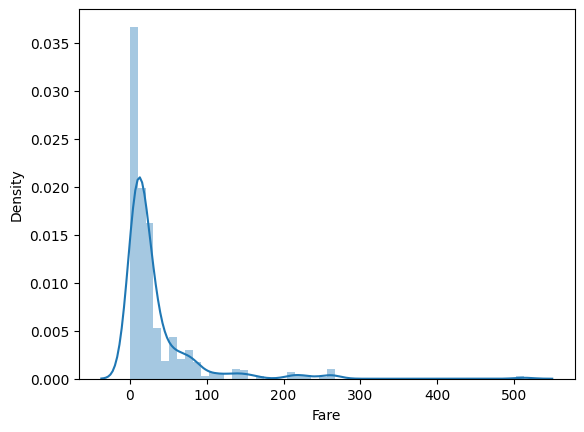

In [306]:
#sns.distplot(train['Fare'])
sns.distplot(df['Fare'])     #still same thing in df also right skewed

In [307]:
df['Fare']=np.log(df['Fare']+1)   #when we use log we add +1 bc if null value or value is 0 we will get an error

<Axes: xlabel='Fare', ylabel='Density'>

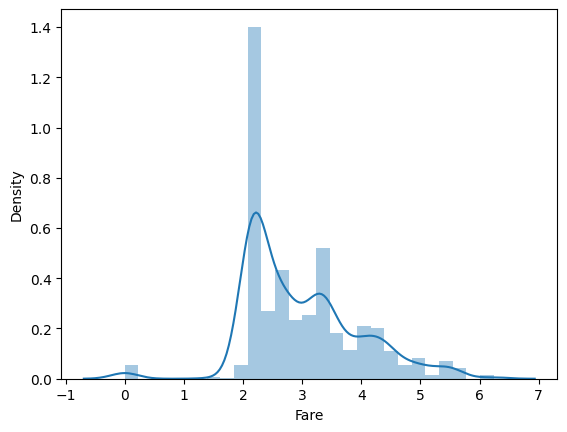

In [308]:
sns.distplot(df['Fare']) 

Now bell is in the centre the graph is ok ok but (we have 0 val and -1 also which is a prblm and should be checked but still its ok) now we can use Fare for training

## Correlation Matrix

<Axes: >

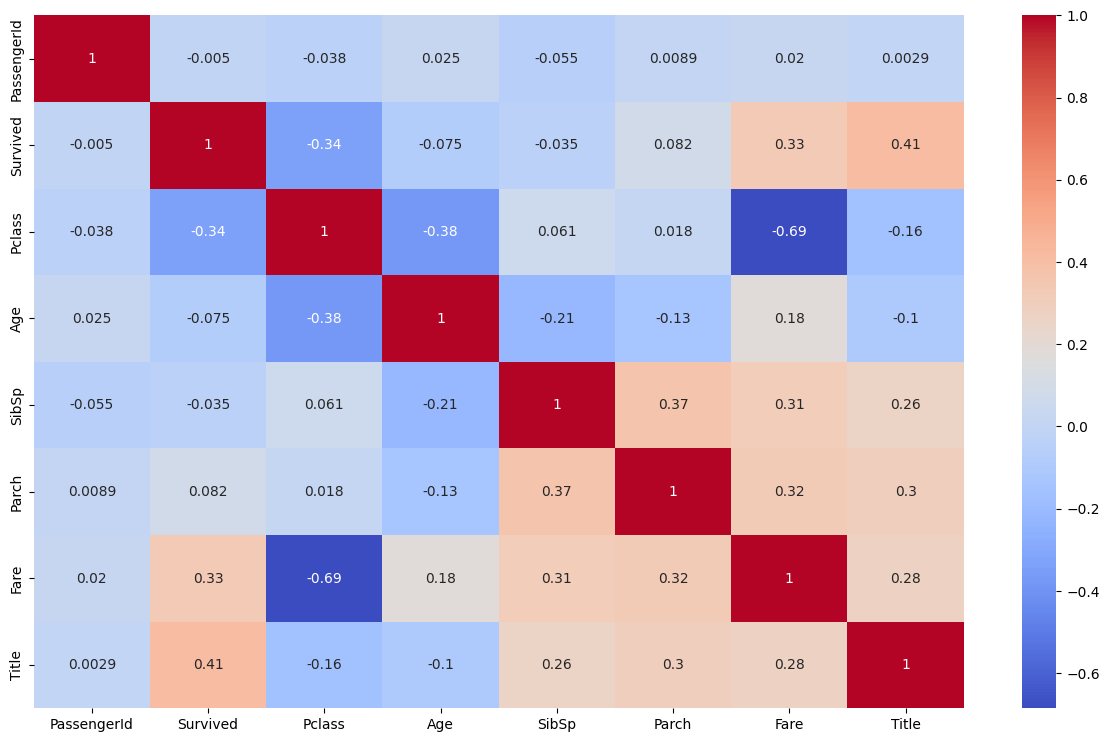

In [309]:
corr=df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

Dark colors => high correlation (look at either lower or upper triangle sme thing)
Fare-Pclass

In [310]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,0.0


**... so we can see PassengerId,Name,Ticket cannot be converted into anything meaningful so they must be dropped (Name can be used in advanced case eg Mr mrs master maybe.....)
and Sex, Embarked will have to be converted into numbers eg M=0, F=1**

In [311]:
#drop unnecessary colums, kept PassengerId b/c it is req for submission
df=df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,2.110213,S,0.0
1,2,1.0,1,female,38.0,1,0,4.280593,C,2.0
2,3,1.0,3,female,26.0,0,0,2.188856,S,1.0
3,4,1.0,1,female,35.0,1,0,3.990834,S,2.0
4,5,0.0,3,male,35.0,0,0,2.202765,S,0.0


## Label Encoding

In [312]:
from sklearn.preprocessing import LabelEncoder   # as no order here therefore LabelEncoder used
cols=['Sex','Embarked']
le= LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])
    
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,1,22.0,1,0,2.110213,2,0.0
1,2,1.0,1,0,38.0,1,0,4.280593,0,2.0
2,3,1.0,3,0,26.0,0,0,2.188856,2,1.0
3,4,1.0,1,0,35.0,1,0,3.990834,2,2.0
4,5,0.0,3,1,35.0,0,0,2.202765,2,0.0


Now all EDA and Preprocesing done (we can go back and do if more required)

## Train-test split

In [313]:
train=df.iloc[:train_len,:]   # =>rows till 0 to train_len-1 , all columns
test=df.iloc[train_len:,:]

In [314]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,1,22.0,1,0,2.110213,2,0.0
1,2,1.0,1,0,38.0,1,0,4.280593,0,2.0
2,3,1.0,3,0,26.0,0,0,2.188856,2,1.0
3,4,1.0,1,0,35.0,1,0,3.990834,2,2.0
4,5,0.0,3,1,35.0,0,0,2.202765,2,0.0


In [315]:
test.head()     # we'll drop the Survived column as that's what we need to predict later on (here we have Nan values in test, no prblm)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
891,892,NaN,3,1,34.5,0,0,2.178064,1,0.0
892,893,NaN,3,0,47.0,1,0,2.079442,2,2.0
893,894,NaN,2,1,62.0,0,0,2.369075,1,0.0
894,895,NaN,3,1,27.0,0,0,2.268252,2,0.0
895,896,NaN,3,0,22.0,1,1,2.586824,2,2.0


In [316]:
# input split (What is this step)   note wer using 'train' only
X=train.drop(columns=['PassengerId','Survived'],axis=1)
Y=train['Survived']

In [317]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,2.110213,2,0.0
1,1,0,38.0,1,0,4.280593,0,2.0
2,3,0,26.0,0,0,2.188856,2,1.0
3,1,0,35.0,1,0,3.990834,2,2.0
4,3,1,35.0,0,0,2.202765,2,0.0


## Model Training

In [318]:
from sklearn.model_selection import train_test_split, cross_val_score
#classify column 

def classify(model):
    x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.25, random_state=42 )
    model.fit(x_train,y_train)
    print('Accuracy:',model.score(x_test, y_test))   
    
    score=cross_val_score(model,X,Y,cv=5)      # will give 5 scores cv=5 => 5 folds
    print('CV_score:',np.mean(score))

* we created a function so that we can use it again and again (inside the fn only we will split for training and-
  validation)  
* test_size means Validation size, random_state ensures whenever splitting it splits in a uniform way (just assign any number)
* X represents the input , Y the output
* print('Accuracy:',model.score(x_test, y_test))   # it will try to predict from the test data and compare with the test result
* we have only used the train datset and split it we havent,we dont use test dataset at all it is only used to make submission in the end (which will be compared with actual values in the kaggle)
* In real life problems we dont have the answers we just predict using the model generated by training
* CV_score is good and should be used in all the projects

In [319]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model)

Accuracy: 0.7937219730941704
CV_score: 0.8047203565375682


In [320]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model)

Accuracy: 0.7757847533632287
CV_score: 0.7744083861653379


In [321]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
classify(model)

Accuracy: 0.8116591928251121
CV_score: 0.8092147385600402


In [322]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
classify(model)

Accuracy: 0.7982062780269058
CV_score: 0.7890276818780992


In [323]:
# can do the xgboost etc in kaggle

In [324]:
from xgboost import XGBClassifier
model= XGBClassifier()
classify(model)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from lightgbm import LGBMClassifier
model= LGBMClassifier()
classify(model)

In [ ]:
from catboost import CatBoostClassifier
model= CatBoostClassifier(verbose=0)    #verbose=0 else it will go deeplearning
classify(model)

## Complete Model Training with Full data

In [ ]:
model = LGBMClassifier()
model.fit(X,Y)      # training with full data so we dont call the classify function here

In [ ]:
test.head()

In [ ]:
# input split for test data we dont need y as thats what we need to predict
X_test=test.drop(columns=['PassengerId','Survived'],axis=1)


In [ ]:
X_test.head()                        #now we have same num of attributes as we trained (the trained data)  no of cols must be same

In [ ]:
pred=model.predict(X_test)
pred

## Test Submission

In [ ]:
#sub=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
#sub.head()

In [ ]:
#sub.info()

In [ ]:
#sub['Survived']=pred
#sub['Survived']= sub['Survived'].astype('int')

In [ ]:
#sub.info()

In [ ]:
#sub.head()

In [ ]:
#sub.to_csv('submission.csv',index=False)    #drops index and only keeps the two columns

## NOTE : we can improve the accuracy by doing hyperparameter tuning and creating new attributes with the help of given attributes and training the model

## DO it!!